<div align="center"> 
    
# **Trabajo Práctico 1: Procesamiento Digital de Señales.**

### Universidad Nacional de Tres de Febrero

 ## Realizado por: Micaela Fopiano, Marcos Montemarano y Luciano Santantonio
 
 

### En este trabajo se desarrollarán distintos códigos que permitirán el análisis de señales de audio.

 En primer lugar se importarán las librerías requeridas para el desarrollo de los scripts:

In [2]:
import numpy as np # Versión 1.20.3
import matplotlib.pyplot as plt # Versión 3.4.3
import librosa # Versión 0.8.1
import soundfile as sf # Versión 0.10.3
import scipy as sp
from scipy.fftpack import fft
from scipy.signal import fftconvolve
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Punto 1
Sintetizar una señal discreta, que simule una nota musical (LA 440), de 2 segundos de duración, muestreada a 44100 Hz.
Considerar 5 componentes armónicas, la fundamental y cuatro armónicos consecutivos. Consideren una ley de decaimiento para la amplitud de los armónicos de $\frac{1}{n}$, en donde n es el número de armónico, siendo $n=1$ la fundamental de la señal. Normalizar a la señal final sintetizada $x[n]$ y graficar las componentes por separado y la señal total.

Comenzamos generando la señal con sus armónicos.

In [4]:
K = 5 # Número de armónicos
f0 = 440 # Frecuencia fundamental 
fs = 44100 # Frecuencia de muestreo (muestras/seg)
N = 2 * fs # Longitud de la señal (muestras)
n = np.arange(0,2,1/fs) # Vector tiempo discreto

tono1 = 1 * np.sin(2*np.pi*f0*n)
tono2 = 1/2 * np.sin(2*np.pi*(2*f0)*n)
tono3 = 1/3 * np.sin(2*np.pi*(3*f0)*n)
tono4 = 1/4 * np.sin(2*np.pi*(4*f0)*n)
tono5 = 1/5 * np.sin(2*np.pi*(5*f0)*n)

A = tono1 + tono2 + tono3 + tono4 + tono5 #x(n)
A = A/max(A) 

Finalmente procedemos a graficar.


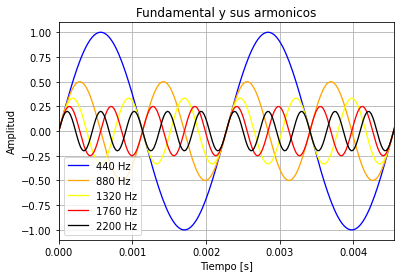

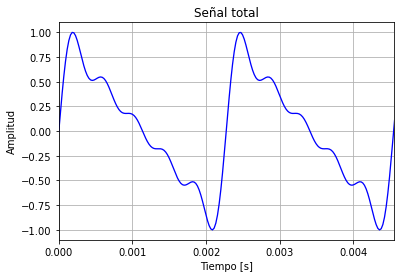

In [ ]:
plt.figure()
plt.xlim(0,2/f0) 
plt.plot(n, tono1, linewidth=1.3, label='440 Hz',
color='blue')
plt.plot(n, tono2, linewidth=1.3, label='880 Hz',
color='orange')
plt.plot(n, tono3, linewidth=1.3, label='1320 Hz',
color='yellow')
plt.plot(n, tono4, linewidth=1.3, label='1760 Hz',
color='red')
plt.plot(n, tono5, linewidth=1.3, label='2200 Hz',
color='black')
plt.title('Fundamental y sus armonicos')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid()
plt.legend(fontsize='medium')
plt.figure()
plt.xlim(0,2/f0)
plt.title('Señal total')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid()
plt.plot(n,A,linewidth=1.3,color='blue')

Por último, calculamos las transformadas de la señal, inclusive la de los componentes armónicos, para su visualización en tiempo y frecuencia.

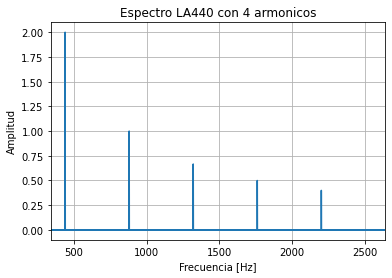

In [ ]:
espectro1 = sp.fftpack.fft(A) # Transformada rapida de Fourier a la señal
eje_frec = sp.fftpack.fftfreq(len(A)) * fs # Almacenar en un array desde 0 Hz hasta fs/2 Hz 
espectro1 /= max(espectro1) # Aplica modulo a la transformada para plotear magnitud

plt.figure(1)    
plt.plot(eje_frec,abs(espectro1))
plt.title('Espectro LA440 con 4 armonicos')
plt.xlim(f0-100,f0*6) # Limites considerables para visualizar los armonicos
plt.xlabel('Frecuencia [Hz]') 
plt.ylabel('Amplitud')
plt.grid()

##Punto 8

Convolucionar linealmente la señal sintetizada en el punto 1 con la respuesta al impulso *resp_imp.wav* (buscarla en la carpeta del aula virtual). Luego convolucionar en forma circular las dos señales con un largo igual a la señal respuesta al impulso. Finalmente, calcular con convolución circular, modificando las señales de forma tal de que el resultado sea igual a la convolución lineal. En todos los casos, graficar las señales convolucionadas y generar los archivos *.wav* correspondientes.

Primero, definimos la funcón de convolución circular tal como la que nos brindó por la cátedra.

In [6]:
import numpy as np

def circular_convolve(in1, in2, period):
    """
    Circular convolution of two 1-dimensional arrays.
    Circular convolve `in1` and `in2` with given `period`.
    Parameters
    ----------
    in1 : array_like, 1-D
        First input.
    in2 : array_like, 1-D
        Second input. Should have the same number of dimensions as `in1`.
  period : int
        Period of the circular convolution.
    Returns
    -------
    result : array, 1-D
        A 1-dimensional array containing the result of the circular
        convolution of `in1` with `in2`.
    See Also
    --------
    convolve
    Notes
    -----
    The (modulo-M) circular/cyclic/periodic convolution of period :math:`M`
    of the two signals :math:`x[k]` and :math:`h[k]` is defined as
    .. math::
        y[k] = \sum_{\kappa=0}^{M-1} \tilde{x}[k - \kappa] \; \tilde{h}[\kappa]
    where the periodic summations :math:`\tilde{x}[k]` and `\tilde{h}[\kappa]`
    of :math:`x[k]` and :math:`x[k]` are defined as
    .. math::
        \tilde{x}[k] &= \sum_{m = -\infty}^{\infty} x[m \cdot M + k] \\
        \tilde{h}[k] &= \sum_{m = -\infty}^{\infty} h[m \cdot M + k]
    Examples
    --------
    Equivalence of circular and linear convolution:
    >>> from scipy import signal
    >>> a = np.ones(5)
    >>> b = np.ones(5)
    >>> circular_convolve(a, b, 5)
    array([ 5.,  5.,  5.,  5.,  5.])
    >>> np.convolve(a, b, mode='full')
    array([ 1.,  2.,  3.,  4.,  5.,  4.,  3.,  2.,  1.])
    >>> circular_convolve(a, b, 9)
    array([ 1.,  2.,  3.,  4.,  5.,  4.,  3.,  2.,  1.])
    """
    in1 = _periodic_summation(in1, period)
    in2 = _periodic_summation(in2, period)

    return np.fromiter([np.dot(np.roll(in1[::-1], k+1), in2)
                        for k in np.arange(period)], float)


def _periodic_summation(x, period):
    """
    Periodic summation of 1-dimensional array or zero-padding.
    If the length of the array is longer or equal to the given `period`
    a periodic summation of `x` is perfomed, otherwise zero-padding to length
    `period`.
    """
    len_x = len(x)
    rows = int(np.ceil(len_x/period))

    if (len_x < int(period*rows)):
        x = np.pad(x, (0, int(period*rows-len_x)), 'constant')

    x = np.reshape(x, (rows, period))

    return np.sum(x, axis=0)

Luego, importamos el archivo de audio y lo convolucionamos de las 3 formas pedidas. Además, se almacenan los audios resultantes, y se grafican.

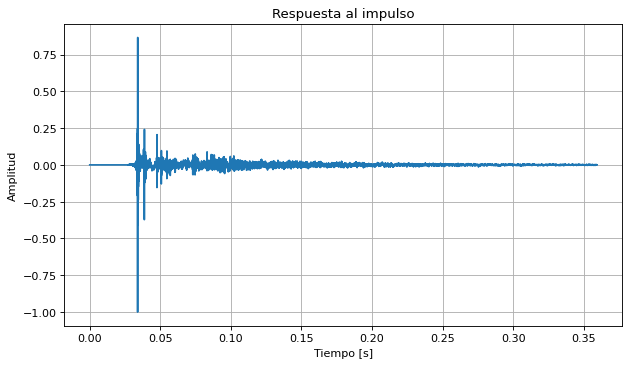

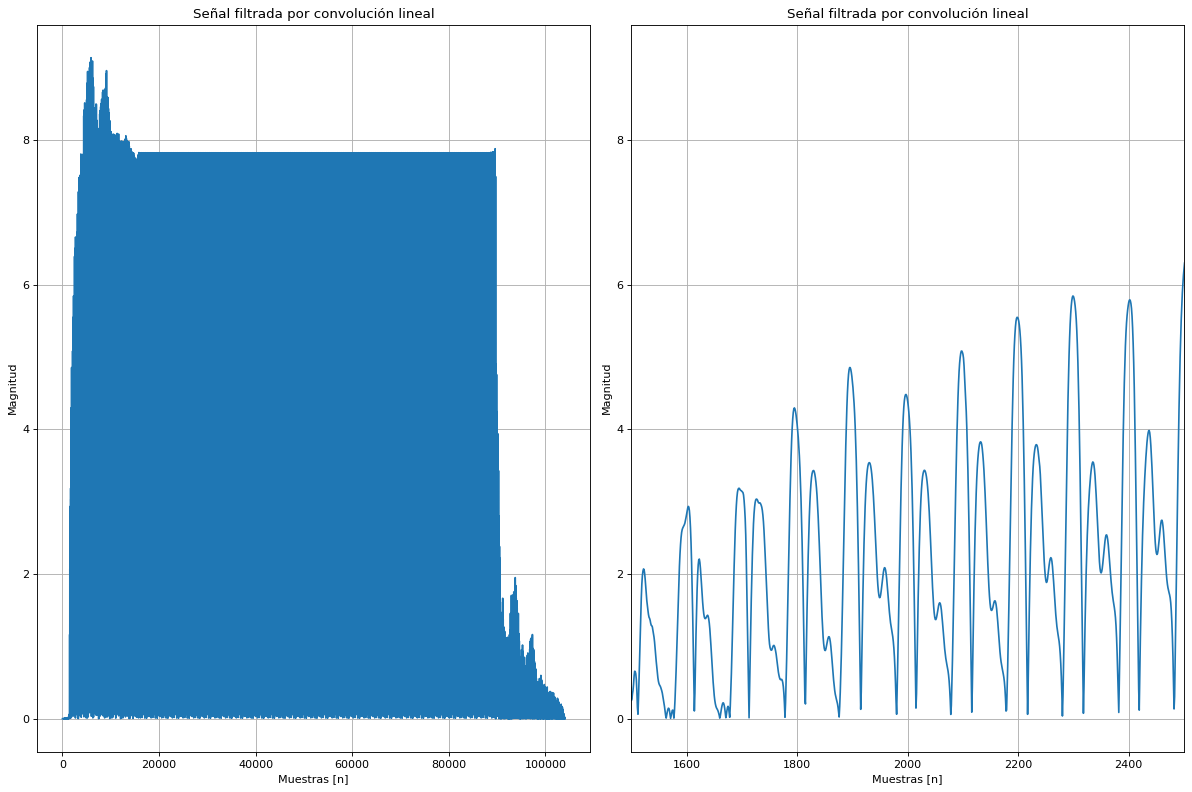

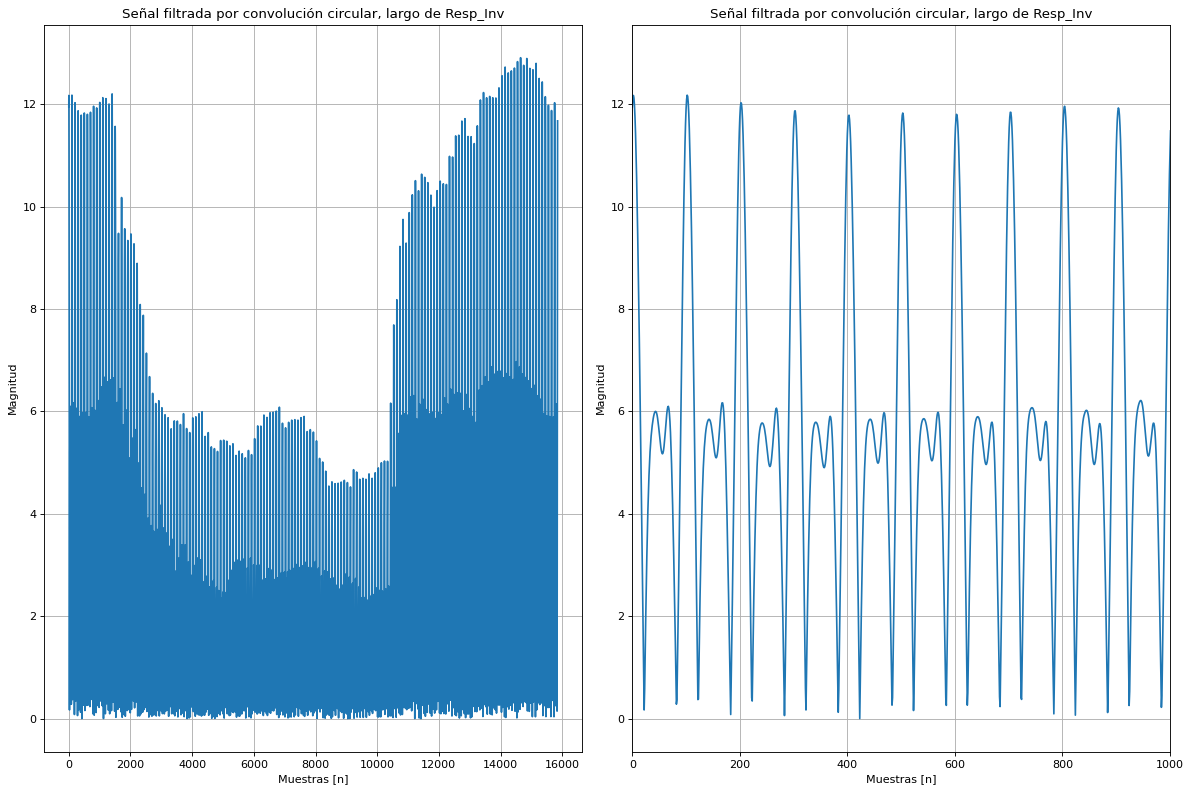

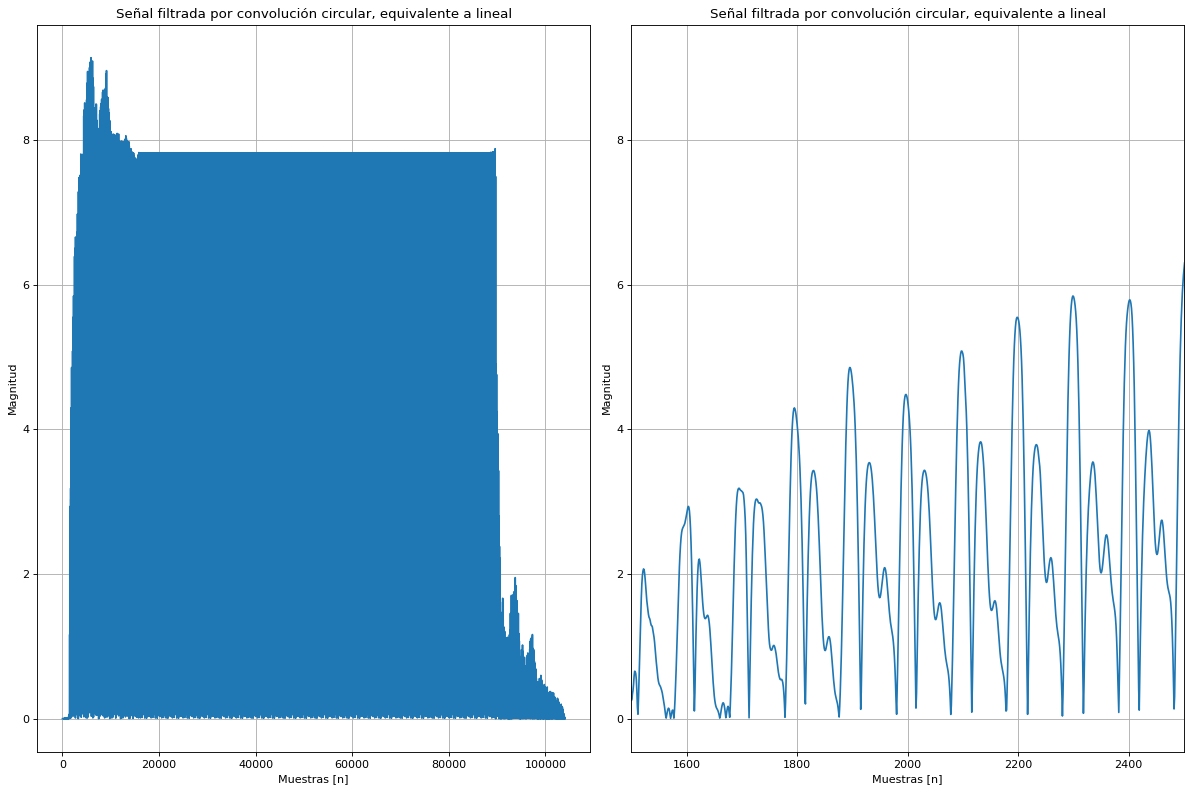

In [7]:
#importo la señal de audio
(h, fs) = sf.read('/content/drive/MyDrive/DSP TP1 - TP2/TP1/DSP-TP1-Jupyter/Resp_Imp.wav') # respuesta al impulso
L1= len(h)

#La grafico
t1 = np.linspace(0,len(h)/fs,num = len(h))
plt.figure(figsize=(9, 5), dpi=80)
plt.plot(t1,h)
plt.ylabel('Amplitud')
plt.xlabel('Tiempo [s]')
plt.title('Respuesta al impulso')
plt.grid()

M1 = len(A)
                          
convolve = np.convolve(A,h)

sf.write('/content/drive/MyDrive/DSP TP1 - TP2/TP1/DSP-TP1-Jupyter/Conv_Lineal.wav',convolve,fs)

plt.figure(figsize=(15, 10), dpi=80)
plt.subplot(1,2,1)
plt.title('Señal filtrada por convolución lineal')
plt.xlabel('Muestras [n]')
plt.ylabel('Magnitud')
plt.plot(abs(convolve))
plt.grid()
plt.subplot(1,2,2)
plt.title('Señal filtrada por convolución lineal')
plt.xlabel('Muestras [n]')
plt.ylabel('Magnitud')
plt.plot(abs(convolve))
plt.xlim(1500,2500)
plt.grid()
plt.tight_layout()
plt.show()

circular = circular_convolve(A, h, L1)

# Guardar audio .wav

sf.write('/content/drive/MyDrive/DSP TP1 - TP2/TP1/DSP-TP1-Jupyter/Conv_Circular1.wav',circular,fs)

plt.figure(figsize=(15, 10), dpi=80)
plt.subplot(1,2,1)
plt.plot(abs(circular))
plt.title('Señal filtrada por convolución circular, largo de Resp_Inv')
plt.xlabel('Muestras [n]')
plt.ylabel('Magnitud')
plt.grid()
plt.subplot(1,2,2)
plt.plot(abs(circular))
plt.title('Señal filtrada por convolución circular, largo de Resp_Inv')
plt.xlabel('Muestras [n]')
plt.ylabel('Magnitud')
plt.xlim(0,1000)
plt.grid()
plt.tight_layout()
plt.show()

#Define período que cumpla el requisito de Conv Lineal = Conv Circular

N1 = M1 + L1 - 1

circular2 = circular_convolve(A, h, N1)

# Guardar audio .wav

sf.write('/content/drive/MyDrive/DSP TP1 - TP2/TP1/DSP-TP1-Jupyter/Conv_Circular2.wav',circular2,fs)

plt.figure(figsize=(15, 10), dpi=80)
plt.subplot(1,2,1)
plt.plot(abs(circular2))
plt.title('Señal filtrada por convolución circular, equivalente a lineal')
plt.xlabel('Muestras [n]')
plt.ylabel('Magnitud')
plt.grid()
plt.subplot(1,2,2)
plt.plot(abs(circular2))
plt.title('Señal filtrada por convolución circular, equivalente a lineal')
plt.xlabel('Muestras [n]')
plt.ylabel('Magnitud')
plt.xlim(1500,2500)
plt.grid()
plt.tight_layout()
plt.show()



##Punto 9

Implementar funciones individuales que permitan calcular los siguientes parámetros temporales
de una señal discreta x[n], con 0≤n≤N-1. Estas funciones deben estar disponibles para reutilizarse en
otros algoritmos. Se seguirán las definiciones dadas en [4]. Aplicarlos a las tres señales .wav que
figuran en la carpeta TP1 en el aula virtual y mostrar los resultados gráficamente.



*   Energía en tiempos cortos (Short Time Energy)
*   Tasa de cruce por cero (Zero-Crossing Rate)
*   Entropía de la Energía (Entropy of Energy)


In [15]:
def ventaneo(signal,fs=44100,len_ventana=512,len_paso=1):
  long_signal = len(signal)
  overlap = (len_ventana//2) # Define el overlap al 50% dado el uso de ventana
  # rectangular

  # Cantidad de ventanas a crear dentro del audio
  cant_ventanas = abs((long_signal - overlap))//abs((len_ventana - overlap))
  muestras_pad = abs((long_signal-overlap)-(len_ventana-overlap))
  



def STE(x,W_l):
  frame = np.arange(0,W_l,1)
  for i in range  :
    STE = np.sum(abs(x)^2)
  STE = STE/W_l

x = np.arange(0,10,1)
W_l = 5

Prueba = STE(x,W_l)

SyntaxError: ignored